## Plate_4042 Red Spectra Analysis

In [154]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

In [428]:
from scipy import stats as scipy_stats

In [155]:
import bossdata
print(bossdata.__version__)

0.3.1


In [156]:
import bossdata.path
import bossdata.remote
import bossdata.meta 
import bossdata.spec as spec
import bossdata.plate as plate

In [429]:
import astropy.io.fits as fits
from astropy.table import Table
from astropy import stats as as_stats

In [158]:
import fitsio
from fitsio import FITS, FITSHDR

In [159]:
from operator import and_

In [160]:
import os
workdir = os.environ['SCRATCH']
os.environ["BOSS_DATA_URL"] = 'http://dr12.sdss3.org'
os.environ["BOSS_LOCAL_ROOT"] = os.path.join(workdir,'sdss')
os.environ["BOSS_SAS_PATH"] = '/sas/dr12/boss'
os.environ["BOSS_REDUX_VERSION"]='v5_7_0'

In [161]:
os.chdir(workdir)
os.getcwd()

'/scratch/kunjias'

In [162]:
finder = bossdata.path.Finder()
mirror = bossdata.remote.Manager()

#### Simulated fibers by spectrograph

Whole range of fibers from 1-500 and 501-1000. Analysis proceeds with fibers by object type.

In [163]:
all_fibers1 = np.arange(1,501,1)

In [164]:
all_fibers2 = np.arange(501,1001,1)

### PlateFile


The PlugMap which contains Object type information is accessed through the Plate File to obtain the sky fiber ID data, and the fiber ID for other object types.

In [165]:
plate_file_path = finder.get_plate_spec_path(plate=4042,mjd=55626)

In [166]:
plate_file_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlate-4042-55626.fits'

In [167]:
plate_file = mirror.get(plate_file_path, progress_min_size=2,auto_download=True, local_paths=None)

In [168]:
plate_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlate-4042-55626.fits'

In [169]:
plate = plate.PlateFile(plate_file)

In [170]:
type(plate)

bossdata.plate.PlateFile

In [171]:
plug_map = plate.plug_map

In [172]:
type(plug_map)

astropy.table.table.Table

In [173]:
plug_map.columns

<TableColumns names=('OBJID','HOLETYPE','RA','DEC','MAG','STARL','EXPL','DEVAUCL','OBJTYPE','XFOCAL','YFOCAL','SPECTROGRAPHID','FIBERID','THROUGHPUT','PRIMTARGET','SECTARGET','OFFSETID','SCI_EXPTIME','SOURCETYPE','LAMBDA_EFF','ZOFFSET','BLUEFIBER','BOSS_TARGET1','BOSS_TARGET2','ANCILLARY_TARGET1','ANCILLARY_TARGET2','RUN','RERUN','CAMCOL','FIELD','ID','CALIBFLUX','CALIBFLUX_IVAR','CALIB_STATUS','SFD_EBV')>

In [174]:
#plug_map

In [175]:
plug_map_by_OBJTYPE = plug_map.group_by('OBJTYPE')

In [27]:
#print (plug_map_by_OBJTYPE)

In [28]:
print(plug_map_by_OBJTYPE.groups.keys)

    OBJTYPE     
----------------
GALAXY          
NA              
QSO             
SKY             
SPECTROPHOTO_STD


In [29]:
print(plug_map_by_OBJTYPE.groups.indices)

[   0  660  687  883  980 1000]


In [30]:
print(plug_map.group_by(['OBJTYPE','FIBERID']).groups.keys)

    OBJTYPE      FIBERID
---------------- -------
GALAXY                 1
GALAXY                 3
GALAXY                 5
GALAXY                 7
GALAXY                 9
GALAXY                11
GALAXY                13
GALAXY                17
GALAXY                19
GALAXY                21
             ...     ...
SPECTROPHOTO_STD     506
SPECTROPHOTO_STD     548
SPECTROPHOTO_STD     590
SPECTROPHOTO_STD     650
SPECTROPHOTO_STD     744
SPECTROPHOTO_STD     748
SPECTROPHOTO_STD     804
SPECTROPHOTO_STD     826
SPECTROPHOTO_STD     906
SPECTROPHOTO_STD     908
SPECTROPHOTO_STD     946
Length = 1000 rows


#### Sky fibers

In [31]:
sky = plug_map_by_OBJTYPE.groups[3]

In [32]:
#print(sky)

In [33]:
type(sky['FIBERID'])

astropy.table.column.Column

In [34]:
#sky['FIBERID']

In [35]:
sky_fibers = np.array(sky['FIBERID'])

In [36]:
#sky_fibers

In [65]:
len(sky_fibers)

97

There are 97 sky fibers in among the 1000 fibers in plate_4042, which is around the average 10% sky fiber ratio in BOSS Survey design.

#### Sky Fibers seperated by Spectrograph

In [66]:
def spec1_fiber(fibers):
    fibers1 = []
    for i in range(0,len(fibers)):
        if fibers[i] < 501:
            fibers1.append(fibers[i])
    return fibers1

In [67]:
def spec2_fiber(fibers):
    fibers2 = []
    for i in range(0,len(fibers)):
        if fibers[i] >= 501:
            fibers2.append(fibers[i])
    return fibers2

In [68]:
sky_fibers1 = spec1_fiber(sky_fibers)

In [69]:
#sky_fibers1

In [70]:
len(sky_fibers1)

47

In [71]:
sky_fibers2 = spec2_fiber(sky_fibers)

In [72]:
#sky_fibers2

In [73]:
len(sky_fibers2)

50

#### Non-SKY Fibers

In [74]:
non_sky_fibers1 = list(filter(lambda x: x not in sky_fibers1, all_fibers1))

In [75]:
len(non_sky_fibers1)

453

In [76]:
non_sky_fibers2 = list(filter(lambda x: x not in sky_fibers2, all_fibers2))

In [77]:
len(non_sky_fibers2)

450

## Plate 4042 plan file

Path to plan file and download to workspace.

In [78]:
combined_plan_path = finder.get_plate_plan_path(plate=4042,mjd=55626, combined=True)

In [79]:
combined_plan_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlancomb-4042-55626.par'

In [80]:
combined_plan_file = mirror.get(combined_plan_path, progress_min_size=2,auto_download=True, local_paths=None)

In [81]:
combined_plan_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spPlancomb-4042-55626.par'

The plan file for configuring BOSS pipeline to combined exposures of plate 4042.

In [84]:
combined_plan = plate.Plan(combined_plan_file)

In [85]:
combined_plan

Get the spectrograph index.

In [86]:
combined_plan.get_spectrograph_index(1)

1

In [87]:
combined_plan.get_spectrograph_index(500)

1

In [88]:
combined_plan.get_spectrograph_index(501)

2

In [89]:
combined_plan.get_spectrograph_index(1000)

2

### Exposure[0], Spectrograph 1, Fiber 1-500

Locate and download the file of a single science exposure for spectrogtaph 1. The exposure file to return is set to 'spCFrame'.

In [90]:
exp0_spec1_path = combined_plan.get_exposure_name(sequence_number=0,band='red',fiber=1,ftype='spCFrame')

In [91]:
exp0_spec1_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r1-00127588.fits'

In [92]:
exp0_spec1_file = mirror.get(exp0_spec1_path)

In [93]:
exp0_spec1_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r1-00127588.fits'

#### Frame file of exposure[0] of spectrograph 1

Frame file containing single exposure 0 of spectrograph 1 (half plate).

In [94]:
expo0_spec1_frame = plate.FrameFile(exp0_spec1_file, index=1, calibrated = True)

In [95]:
# expo0_spec1_frame
print('plate_number:',expo0_spec1_frame.plate,
'camera:',expo0_spec1_frame.camera,
'exposure_id:',expo0_spec1_frame.exposure_id)
# expo0_spec1_frame.header

plate_number: 4042 camera: r1 exposure_id: 127588


#### Concern with wavelength shifts?

In [96]:
fiber2 = expo0_spec1_frame.get_valid_data(fibers = [2],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [97]:
fiber3 = expo0_spec1_frame.get_valid_data(fibers = [3],pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [98]:
fiber2.shape

(1, 4128)

In [99]:
fiber3.shape

(1, 4128)

In [100]:
wavelength_2 = fiber2['wavelength'].data

In [101]:
wavelength_3 = fiber3['wavelength'].data

In [102]:
np.mean((wavelength_3 - wavelength_2)/wavelength_2)

-3.5473622e-05

In [103]:
np.mean((wavelength_3 - wavelength_2)/wavelength_3)

-3.547517e-05

The BOSS spectroscopic data is taken under resolution of 1500 at 3800 Å, 2500 at 9000 Å.

In [104]:
1/2500

0.0004

In [105]:
1/1500

0.0006666666666666666

The percentage change in wavelength data between fiber2 and fiber 3 is less than 1%, and inverse of BOSS's resolution is larger than the percentage change in wavelength difference between fibers. Thus, the wavelength shift is negligible. (These two fibers are taken as examples.)

#### Get valid data for the 47 sky fibers in Spectrograph 1.

In [106]:
spec1_sky = expo0_spec1_frame.get_valid_data(fibers = sky_fibers1,pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [679]:
#spec1_sky

In [117]:
spec1_sky.shape

(47, 4128)

In [118]:
type(spec1_sky)

numpy.ma.core.MaskedArray

Access the wavelength, flux, sky, and ivar fields by creating new masked arrays.

#### Wavelength

In [119]:
wavelength_spec1 = spec1_sky['wavelength']

In [120]:
wavelength_spec1.shape

(47, 4128)

Total number of data points if all are valid.

In [121]:
47 * 4128

194016

Count the number of non-masked elements along rows (fibers).

In [122]:
wavelength_spec1.count(axis=1)

array([4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128])

Total number of valid elements in the flux  masked array.

In [123]:
wavelength_spec1.count(axis=1).sum()

194016

#### Flux

In [124]:
flux_spec1 = spec1_sky['flux']

In [125]:
flux_spec1.shape

(47, 4128)

In [126]:
flux_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

In [127]:
flux_spec1.count(axis=1).sum()

102756

#### Sky

In [128]:
sky_spec1 = spec1_sky['sky']

In [129]:
sky_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

In [130]:
sky_spec1.count(axis=1).sum()

102756

#### Sky + Flux

In [197]:
total_flux_spec1 = np.ma.array(flux_spec1.data+sky_spec1.data, mask=list(map(and_,flux_spec1.mask, sky_spec1.mask)))

In [198]:
total_flux_spec1.shape

(47, 4128)

In [199]:
total_flux_spec1.count(axis=1)

array([2224, 2243, 2203, 2159, 2220, 2248, 2186, 2195, 2172, 2184, 2160,
       2211, 2160, 2189, 2190, 2187, 2189, 2213, 2195, 2201, 2159, 2181,
       2199, 2177, 2182, 2152, 2161, 2180, 2183, 2150, 2207, 2169, 2175,
       2181, 2180, 2129, 2170, 2162, 2175, 2182, 2178, 2175, 2200, 2182,
       2237, 2189, 2212])

Check the total number of valid data in total_flux.

In [200]:
len(total_flux_spec1.compressed())

102756

#### Inverse Variance

Inverse Variance is used as weights to computed the weighted average of total flux for sky fibers.

In [201]:
ivar_spec1 = spec1_sky['ivar']

In [202]:
type(ivar_spec1)

numpy.ma.core.MaskedArray

In [203]:
ivar_spec1.shape

(47, 4128)

Check number of valid data in the inverse variance masked array.

In [204]:
ivar_spec1.count(axis=1).sum()

102756

Fill in the invalid inverse variance data with value 0.

In [205]:
weights_by_ivar = ma.filled(ivar_spec1, fill_value=0)

In [206]:
type(weights_by_ivar)

numpy.ndarray

In [207]:
weights_by_ivar.shape

(47, 4128)

A plot for the total flux among the 47 sky fibers in spectrograph 1.

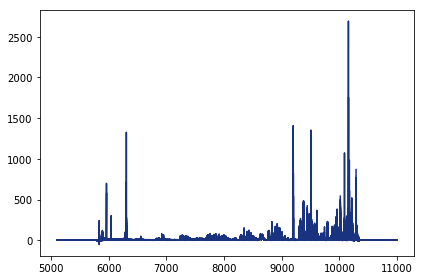

In [170]:
x = wavelength_spec1.data
y = total_flux_spec1.data
plt.plot(x,y,c =[0.1,0.2,0.5])
plt.tight_layout()
plt.show()

##### Simple Average
Average of total_flux among 47 sky fibers with no weights.

In [107]:
simple_average = ma.average(total_flux_spec1, axis=0, returned=False)

In [108]:
type(simple_average)

numpy.ma.core.MaskedArray

In [109]:
simple_average_flux1 = simple_average.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

In [111]:
wavelength_fiber14 = wavelength_spec1[0]

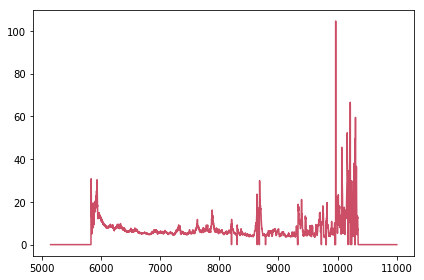

In [112]:
x = wavelength_fiber14
y = simple_average_flux1
plt.plot(x,y,c =[0.8,0.3,0.4])
plt.tight_layout()
plt.show()

#### Weighted Average
Average of total_flux of 47 sky fibers in spectrograph 1 weighted by inverse variance.

In [208]:
weighted_average_spec1 = ma.average(total_flux_spec1,axis=0, weights = weights_by_ivar, returned= False)

In [267]:
type(weighted_average_spec1)

numpy.ma.core.MaskedArray

In [209]:
average_sky_flux1 = weighted_average_spec1.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

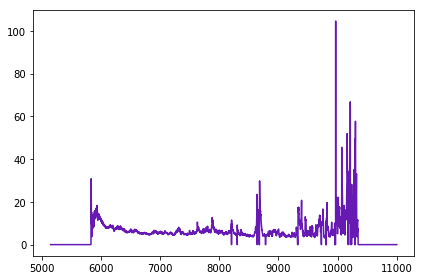

In [434]:
x = wavelength_fiber14
y = average_sky_flux1
plt.plot(x,y,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()

Calculate the residuals when subtracted from total_flux_spec1, total flux of the sky fibers.

In [213]:
total_flux_residuals_sky_fiber = np.ma.array(total_flux_spec1.data - repeated47_average_sky_flux1, mask = total_flux_spec1.mask)

In [462]:
np.min(total_flux_residuals_sky_fiber.data)

-64.74988

In [488]:
np.median(total_flux_residuals_sky_fiber.data)

0.0

In [ ]:
np.max(total_flux_residuals_sky_fiber.data)

A plot of wavelength vs. residuals from total flux of 47 sky fibers.

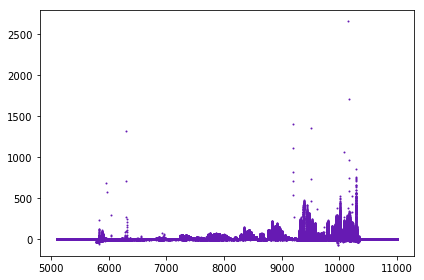

In [435]:
x = wavelength_spec1.data
y = total_flux_residuals_sky_fiber.data

plt.scatter(x,y,s=1,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()

### PCA on total flux from sky fibers

In [387]:
from sklearn import preprocessing

In [388]:
X = total_flux_spec1.data

Standardize total flux matrix using Scipy z-score.

In [430]:
X_scaled = scipy_stats.zscore(total_flux_spec1, axis=0)

In [431]:
X_scaled.shape

(47, 4128)

Number of valid column

In [472]:
X_scaled.std(axis=0).count()

3102

Mean of zero.

In [473]:
X_scaled.mean(axis=0).data.sum()

-2.3742466618244427e-05

In [474]:
np.mean(X_scaled.mean(axis=0).data)

-5.751566525737506e-09

In [487]:
np.median(X_scaled.mean(axis=0).data)

0.0

In [488]:
as_stats.median_absolute_deviation(X_scaled.mean(axis=0).data)

1.2295749877664818e-07

Standard deviation of one.

There are 3102 valid data points in total. The sum of all standard deviations should be close to 3102.

In [481]:
X_scaled.std(axis=0).data.sum()

3101.999999999538

In [482]:
np.mean(X_scaled.std(axis=0).data)

0.7514534883719811

In [483]:
np.median(X_scaled.std(axis=0).data)

0.9999999999999494

In [503]:
as_stats.median_absolute_deviation(X_scaled.std(axis=0).data)

4.973799150320701e-14

Standardization through sklearn.preprocessing.StandardScaler.

It removes the mean and scale to unit variance.

In [489]:
scaler = preprocessing.StandardScaler().fit(X)

In [490]:
scaler.mean_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [491]:
scaler.scale_

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [492]:
scaler.transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Mean of zero 0.

In [542]:
scaler.transform(X).mean(axis=0).sum()

2.2240649e-05

In [495]:
np.mean(scaler.transform(X).mean(axis=0))

5.3877542e-09

In [497]:
np.median(scaler.transform(X).mean(axis=0))

0.0

In [498]:
as_stats.median_absolute_deviation(scaler.transform(X).mean(axis=0))

7.6091034e-08

Standard deviation of one. 
There are 3102 valid data points in total. The sum of all standard deviations should be close to 3102.

In [500]:
scaler.transform(X).std(axis=0).sum()

3156.0

In [502]:
np.mean(scaler.transform(X).std(axis=0))

0.7645349

In [501]:
np.median(scaler.transform(X).std(axis=0))

0.99999994

In [505]:
as_stats.median_absolute_deviation(scaler.transform(X).std(axis=0))

5.9604645e-08

In [563]:
np.median(scaler.transform(X).std(axis=0)) + as_stats.median_absolute_deviation(scaler.transform(X).std(axis=0))

1.0

Standardization through sklearn.preprocessing.RobustScaler.

It removes the median and scales the data according to the quantile range.

In [520]:
robust_scaler = preprocessing.RobustScaler().fit(X)

In [521]:
robust_scaler.center_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [522]:
robust_scaler.scale_

array([1., 1., 1., ..., 1., 1., 1.])

In [523]:
robust_scaler.transform(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [526]:
robust_scaler.transform(X).mean(axis=0).sum()

1376.3271

In [527]:
np.mean(robust_scaler.transform(X).mean(axis=0))

0.3334126

In [528]:
np.median(robust_scaler.transform(X).mean(axis=0))

0.14807072

In [529]:
as_stats.median_absolute_deviation(robust_scaler.transform(X).mean(axis=0))

0.14807072

Standard deviation of one. 
There are 3102 valid data points in total. The sum of all standard deviations should be close to 3102.

In [530]:
robust_scaler.transform(X).std(axis=0).sum()

4968.9014

In [531]:
np.mean(robust_scaler.transform(X).std(axis=0))

1.2037067

In [532]:
np.median(robust_scaler.transform(X).std(axis=0))

0.7496296

In [533]:
as_stats.median_absolute_deviation(robust_scaler.transform(X).std(axis=0))

0.2736785

Manual standardization (Subtracting mean and divided by standard deviation).

In [537]:
tf_sd = ma.std(total_flux_spec1, axis=0)

In [538]:
tf_mean = ma.mean(total_flux_spec1,axis=0)

In [539]:
total_flux_spec1.shape

(47, 4128)

In [540]:
total_standardized = (total_flux_spec1-tf_mean)/tf_sd

In [541]:
total_standardized.shape

(47, 4128)

In [550]:
type(total_standardized)

numpy.ma.core.MaskedArray

Mean of zero.

In [552]:
total_standardized.mean(axis=0).data.sum()

-2.3742466618244427e-05

In [553]:
np.mean(total_standardized.mean(axis=0).data)

-5.751566525737506e-09

In [554]:
np.median(total_standardized.mean(axis=0).data)

0.0

In [560]:
as_stats.median_absolute_deviation(total_standardized.mean(axis=0).data)

1.2295749877664818e-07

Standard deviation of one. 
There are 3102 valid data points in total. The sum of all standard deviations should be close to 3102.

In [555]:
total_standardized.std(axis=0).data.sum()

3101.999999999538

In [556]:
np.mean(total_standardized.std(axis=0).data)

0.7514534883719811

In [557]:
np.median(total_standardized.std(axis=0).data)

0.9999999999999494

In [561]:
as_stats.median_absolute_deviation(total_standardized.std(axis=0).data)

4.973799150320701e-14

One MAD (median absolute deviation) interval from median mean and median standard deviation. The goal is to have a mean of 0 and a standard deviation of 1.

Interval for scipy.zscore and manual calculation.

In [571]:
np.median(total_standardized.mean(axis=0).data) - as_stats.median_absolute_deviation(total_standardized.mean(axis=0).data)

-1.2295749877664818e-07

In [572]:
np.median(total_standardized.mean(axis=0).data) + as_stats.median_absolute_deviation(total_standardized.mean(axis=0).data)

1.2295749877664818e-07

In [569]:
np.median(total_standardized.std(axis=0).data) - as_stats.median_absolute_deviation(total_standardized.std(axis=0).data)

0.9999999999998996

In [568]:
np.median(total_standardized.std(axis=0).data) + as_stats.median_absolute_deviation(total_standardized.std(axis=0).data)

0.9999999999999991

Interval for preprocessing.Scaler calculation.

In [575]:
np.median(scaler.transform(X).mean(axis=0)) - as_stats.median_absolute_deviation(scaler.transform(X).mean(axis=0))

-7.6091034e-08

In [576]:
np.median(scaler.transform(X).mean(axis=0)) + as_stats.median_absolute_deviation(scaler.transform(X).mean(axis=0))

7.6091034e-08

In [577]:
np.median(scaler.transform(X).std(axis=0)) - as_stats.median_absolute_deviation(scaler.transform(X).std(axis=0))

0.9999999

In [578]:
np.median(scaler.transform(X).std(axis=0)) + as_stats.median_absolute_deviation(scaler.transform(X).std(axis=0))

1.0

The standardization results obtained form using scipy.zscore and manual calculation are the same, while sklearn.preprocessing.StandardScaler provides the best standardization since its median deviation interval of the mean has range closer around 0, and its median deviation interval of the standard deviation contains 1.

#### Fit the model and apply dimensionality reduction on total flux of 47 sky fibers

In [1374]:
from sklearn import decomposition

In [1375]:
total_flux_scaled = scaler.transform(X)

In [1376]:
total_flux_scaled.shape

(47, 4128)

In [1377]:
pca = decomposition.PCA(n_components = 47)

In [1378]:
pca.fit(total_flux_scaled)

PCA(copy=True, iterated_power='auto', n_components=47, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1379]:
print(pca.explained_variance_ratio_)

[2.19207615e-01 1.54347777e-01 1.03967294e-01 8.49681720e-02
 5.80805168e-02 4.93013896e-02 4.04317826e-02 2.88645010e-02
 2.25780495e-02 2.06022933e-02 1.73020922e-02 1.25277927e-02
 1.21007571e-02 1.01174349e-02 9.54402238e-03 8.36154260e-03
 7.95927271e-03 7.16058677e-03 6.85354834e-03 6.38544559e-03
 6.17121253e-03 6.04692847e-03 5.92701044e-03 5.73489023e-03
 5.62608009e-03 5.33246063e-03 5.28543722e-03 5.20142401e-03
 5.07623283e-03 4.85795783e-03 4.68601240e-03 4.57566511e-03
 4.55568405e-03 4.44721850e-03 4.33822395e-03 4.28939378e-03
 4.13350295e-03 4.01872490e-03 3.88514181e-03 3.86803737e-03
 3.79185262e-03 3.67065938e-03 3.55064869e-03 3.50640365e-03
 3.42048495e-03 3.34088760e-03 3.87032859e-15]


In [1380]:
np.sum([2.19207615e-01,1.54347777e-01, 1.03967294e-01 ,8.49681720e-02,
 5.80805168e-02 ,4.93013896e-02 ,4.04317826e-02 ,2.88645010e-02,
 2.25780495e-02 ,2.06022933e-02 ,1.73020922e-02, 1.25277927e-02,
 1.21007571e-02, 1.01174349e-02])

0.8343974676999999

In [1381]:
total_flux_reduced = pca.fit_transform(total_flux_scaled)

Obtain eigenvectors (direction of principal components) from attribute of PCA Class.

In [1382]:
eigenvectors = pca.components_

In [1383]:
eigenvectors.shape

(47, 4128)

Calculate the eigenvalues (principal component amplitudes) for 47 sky spectra.
$$
a_j = f \cdot e_j
$$

$a_j$ are the principal component amplitudes(eigenvalues), $e_j$ are the eigenvectors.

In [1409]:
eigenvalues = np.dot(total_flux_spec1.data, eigenvectors.T)

In [1410]:
eigenvalues.shape

(47, 47)

Plot the first five eigenvectors from pca.

A sample wavelength array from the first sky spectra is taken.

In [1386]:
arange(4)

array([0, 1, 2, 3])

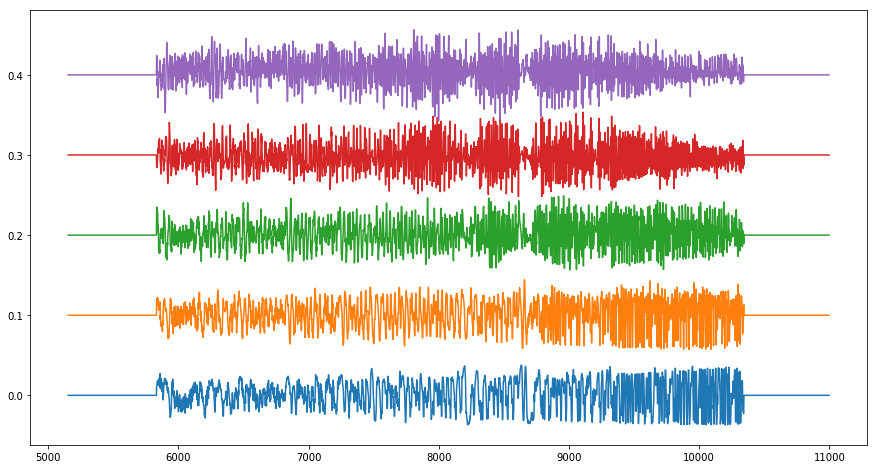

In [1387]:
x = wavelength_spec1[0,:].data
y1 = eigenvectors[0]
y2 = eigenvectors[1]
y3 = eigenvectors[2]
y4 = eigenvectors[3]
y5 = eigenvectors[4]

plt.figure(figsize = (15,8))
plt.plot(x,y1,x,y2+0.1,x,y3+0.2,x,y4+0.3,x,y5+0.4)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(-0.1, 0.5, 60))
plt.show()

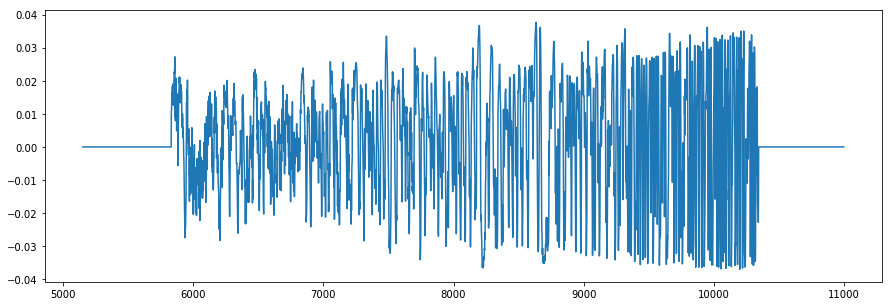

In [1388]:
# Eigenspectrum from the first principal component
x = wavelength_spec1[0,:].data
y = eigenvectors[0]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.show()

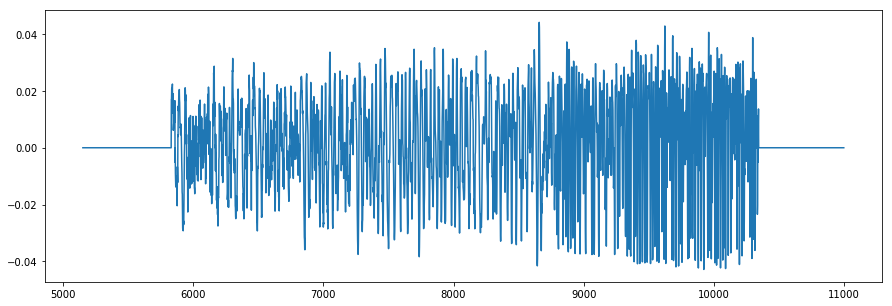

In [1389]:
# Eigenspectrum from the second principal component
x = wavelength_spec1[0,:].data
y = eigenvectors[1]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.show()

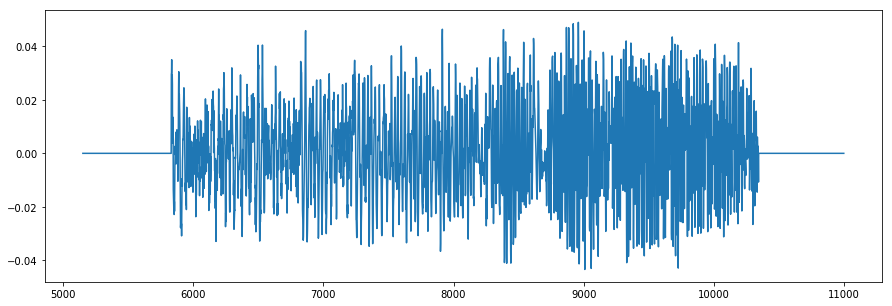

In [1390]:
# Eigenspectrum from the third principal component
x = wavelength_spec1[0,:].data
y = eigenvectors[2]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.show()

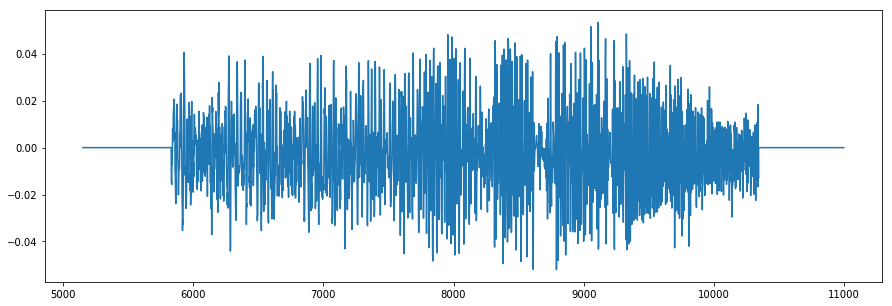

In [1391]:
# Eigenspectrum from the fourth principal component
x = wavelength_spec1[0,:].data
y = eigenvectors[3]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.show()

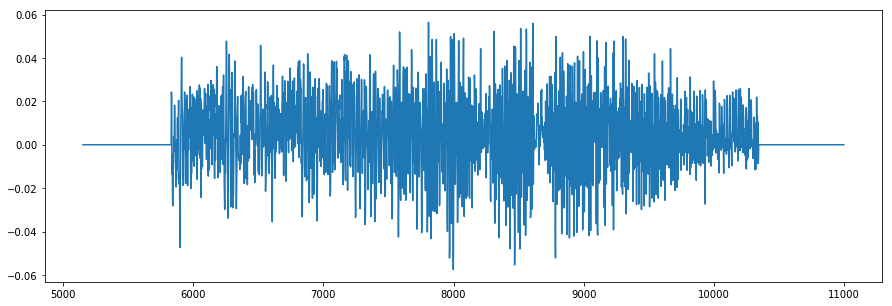

In [1392]:
# Eigenspectrum from the fifth principal component
x = wavelength_spec1[0,:].data
y = eigenvectors[4]

plt.figure(figsize = (15,5))
plt.plot(x,y)
plt.show()

In [1393]:
eigenvectors[0:5,:].shape

(5, 4128)

Reconstruct the input spectrum from eigenvectors and eigenvalues.
$$
f_k = \sum_{j=1}^{M} a_j e_{jk}
$$

In [1394]:
eigenvectors.shape

(47, 4128)

In [1412]:
projection = eigenvalues @ eigenvectors

In [1415]:
pca_residual = total_flux_spec1 - projection

Residual Scatter plot of pca model with 47 componets on Total Sky Flux.

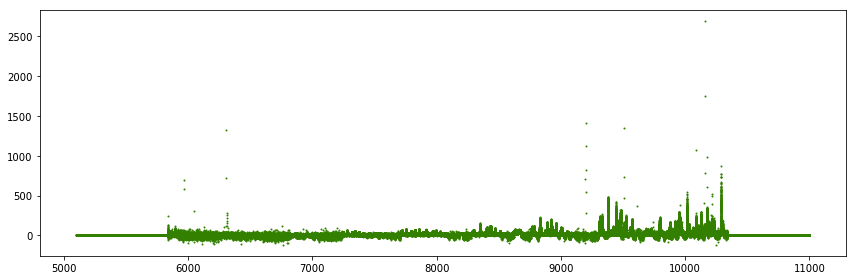

In [1434]:
x = wavelength_spec1.data
y = pca_residual.data

plt.figure(figsize = (12,4))

plt.scatter(x,y,s=1,c =[0.2,0.5,0.])
plt.tight_layout()
plt.show()

A plot of wavelength vs. residuals from total flux of 47 sky fibers.

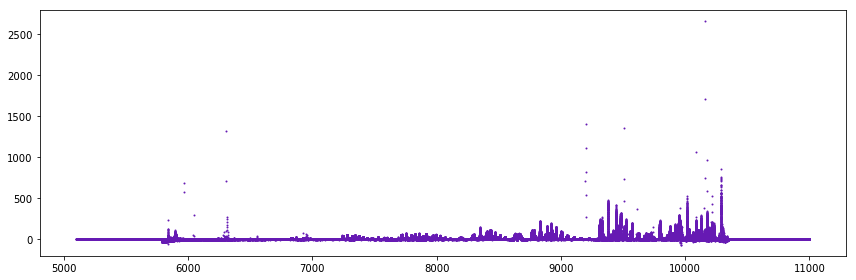

In [1435]:
x = wavelength_spec1.data
y = total_flux_residuals_sky_fiber.data

plt.figure(figsize = (12,4))
plt.scatter(x,y,s=1,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()

In [1416]:
pca_residual_ratio = pca_residual / total_flux_spec1

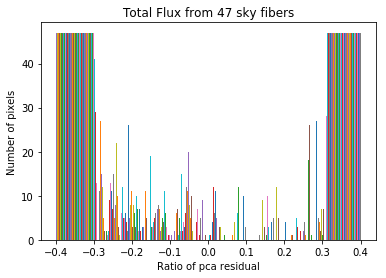

In [1500]:
plt.hist(pca_residual_ratio, bins='auto')
plt.title("Total Flux from 47 sky fibers")
plt.xlabel('Ratio of pca residual')
plt.ylabel('Number of pixels')
plt.show()

Residual of total flux between first sky fiber and pca estimated first sky fiber. 

Obtain the mean and standard deviation of the principal components amplitudes, and the 5$\sigma$ intervals.

In [1439]:
eigen_mean = np.mean(eigenvalues,axis=0)

In [1440]:
eigen_sd = np.std(eigenvalues, axis=0)

In [1441]:
eigen_min = eigen_mean - 5*eigen_sd

In [1442]:
#eigen_min

In [1443]:
eigen_max = eigen_mean + 5*eigen_sd

In [1444]:
#eigen_max

# ?

Functions that remove spectra with principal component amplitudes more than 5$\sigma$ away from the mean.

In [ ]:
def remove_min (all_spectra, minimum):
    
    for i in range(all_spectra.shape[0]):
        for element in all_spectra[:,i]:
            if element < minimum[i]:
                all_spectra = np.delete(all_spectra,(i),axis=0)
                

In [1210]:
def remove(all_spectra,maximum,minimum):
    
    for i in range(all_spectra.shape[0]):
        for element in all_spectra[:,i]:
            if (element > maximum[i]) or (element < minimum[i]):
                all_spectra = np.delete(all_spectra,(i),axis=0)
                print(i)
                
                
    for i in range(all_spectra.shape[0]):
        for element in all_spectra[:,i]:
            if element < minimum[i]:
                all_spectra = np.delete(all_spectra,(i),axis=0)
                print(i)
                
    return all_spectra

A function to find outlying eigenvalue indices for those more than 5$\sigma$ away from the mean.

In [1445]:
def find_outlier(all_spectra):
    '''Find lists of indices of outlying eigenvalue spectra. 
    
    Parameters
    ----------
    all_spectra: An numpy ndarray containing eigenvalues from the pca
    
    Returns
    --------
    One list for lower outliers below the minimum value, and another list for upper outliers above the maximum value.
    '''
    upper_outlier = []
    lower_outlier = []
    for i in range(all_spectra.shape[0]):
        for element in all_spectra[:,i]:
            if element < eigen_min[i]:
                lower_outlier.append(i)
            if element > eigen_max[i]:
                upper_outlier.append(i)
    return lower_outlier, upper_outlier

In [1447]:
find_outlier(eigenvalues)

([30, 36, 44], [15, 31, 32, 34, 37, 39, 45])

In [1448]:
outlier_index = sorted(find_outlier(eigenvalues)[0]+find_outlier(eigenvalues)[1])

In [1449]:
outlier_index

[15, 30, 31, 32, 34, 36, 37, 39, 44, 45]

In [1450]:
len(outlier_index)

10

Removing those outlying sky spectra, which leaves 37 spectra within the 5$\sigma$ range.

In [1452]:
total_flux_removed = np.delete(total_flux_spec1,outlier_index,axis=0)

In [1453]:
total_flux_removed.shape

(37, 4128)

In [1454]:
type(total_flux_removed)

numpy.ma.core.MaskedArray

#### Fit the model and apply dimensionality reduction on total flux of 37 sky fibers

Perform PCA after removal of those outlying spectra.

In [1455]:
Y = total_flux_removed.data

Standardize outlier-removed spectra using StandardScaler

In [1456]:
scaler_removed = preprocessing.StandardScaler().fit(Y)

In [1457]:
scaler_removed.mean_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [1458]:
scaler_removed.scale_

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [1459]:
scaler_removed.transform(Y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [1460]:
total_flux_removed_scaled = scaler_removed.transform(Y)

In [1461]:
type(total_flux_removed_scaled)

numpy.ndarray

In [1462]:
pca_removed = decomposition.PCA(n_components = 37)

In [1463]:
pca_removed.fit(total_flux_removed_scaled)

PCA(copy=True, iterated_power='auto', n_components=37, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1464]:
print(pca_removed.explained_variance_ratio_)

[2.3735045e-01 1.5221998e-01 9.4254144e-02 7.9395004e-02 6.3195601e-02
 5.4299522e-02 4.2005915e-02 3.1464767e-02 2.5952727e-02 1.7788325e-02
 1.6977523e-02 1.3603065e-02 1.2986921e-02 1.1709183e-02 1.1606408e-02
 9.7839292e-03 8.8577541e-03 7.8919716e-03 7.7080796e-03 7.5617214e-03
 7.5218803e-03 7.1728798e-03 6.7577707e-03 6.5939259e-03 6.3532023e-03
 6.2555643e-03 6.0379934e-03 5.8969879e-03 5.6839543e-03 5.4316828e-03
 5.2552149e-03 5.1946035e-03 5.1211230e-03 4.8745666e-03 4.7260877e-03
 4.5095645e-03 1.3489163e-14]


In [1465]:
type(pca_removed.explained_variance_ratio_)

numpy.ndarray

In [1466]:
def get_variance_sum(variance, number):
    '''Return the total proportion of explained variance with corresponding input number of components in percentage terms.
    
    Parameters
    ----------
    variance: numpy array containing explained variance ratio from the pca output
    number: specified number of componenets to keep
    
    Returns:
    A sum of explained variance proportion and the number of componenets
    '''
    variance_sum = 0
    for n in range(number):
        variance_sum = variance_sum + variance[n]
    print (number, "components explain" ,variance_sum*100 ,"% of variantion")

In [1467]:
get_variance_sum(pca_removed.explained_variance_ratio_, 15)

15 components explain 86.48095335811377 % of variantion


In [1468]:
def above_one_percent_variance_ratio(variance):
    '''Return the sum of those explained variance ratio above 1 percent with the total number of such variances.
    
    Parameters
    ----------
    variance: numpy array containing explained variance ratio from the pca output
    
    Returns
    -------
    The number of explained variances with ratio above 1 percent and a sum of their ratios.
    '''
    componenets_to_keep = []
    number_of_components = 0
    for i in variance:
        if i > 0.01:
            componenets_to_keep.append(i)
            number_of_components = number_of_components +1
    return np.sum(componenets_to_keep), number_of_components

In [1469]:
above_one_percent_variance_ratio(pca.explained_variance_ratio_)

(0.8343974, 14)

There are 14 components with explained variance ratio above 1 percent in the pca fitting of the original 47 sky fibers.

In [1470]:
above_one_percent_variance_ratio(pca_removed.explained_variance_ratio_)

(0.86480945, 15)

There are 15 components with explained variance ratio above 1 percent in the pca fitting of the outlier-removed 37 sky fibers.

Obtain eigenvectors(direction of principal components) for 37 outlier-removed sky fibers.

In [1471]:
eigenvectors_sample = pca_removed.components_

In [1472]:
eigenvectors_sample.shape

(37, 4128)

Calculate the eigenvalues (principal component amplitudes) for 37 sky spectra.
$$
a_j = f \cdot e_j
$$

$a_j$ are the principal component amplitudes(eigenvalues), $e_j$ are the eigenvectors.

In [1481]:
eigenvalues_sample = np.dot(total_flux_spec1.data, eigenvectors_sample.T)

In [1490]:
eigenvalues_sample.shape

(47, 37)

Plot the first five eigenvectors.

A sample wavelength array from the first sky spectra is taken.

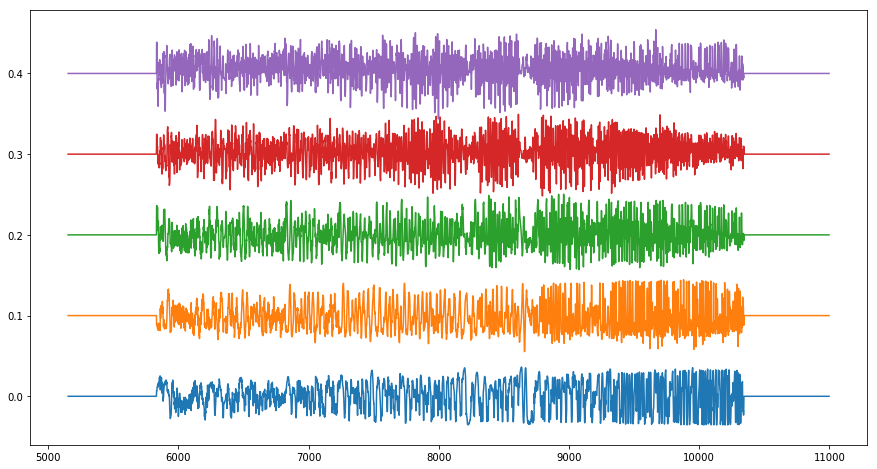

In [1483]:
x = wavelength_spec1[0,:].data
y1 = eigenvectors_sample[0]
y2 = eigenvectors_sample[1]
y3 = eigenvectors_sample[2]
y4 = eigenvectors_sample[3]
y5 = eigenvectors_sample[4]

plt.figure(figsize = (15,8))
plt.plot(x,y1,x,y2+0.1,x,y3+0.2,x,y4+0.3,x,y5+0.4)
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(-0.1, 0.5, 60))
plt.show()

Reconstruct the input spectrum from eigenvectors and eigenvalues.
$$
f_k = \sum_{j=1}^{M} a_j e_{jk}
$$

In [1484]:
eigenvectors_sample.shape

(37, 4128)

In [1491]:
projection_sample = eigenvalues_sample @ eigenvectors_sample

In [1492]:
projection_sample.shape

(47, 4128)

In [1493]:
pca_residual_sample = total_flux_spec1 - projection_sample

Residual Scatter plot of pca model with 37 components on Total Sky Flux.

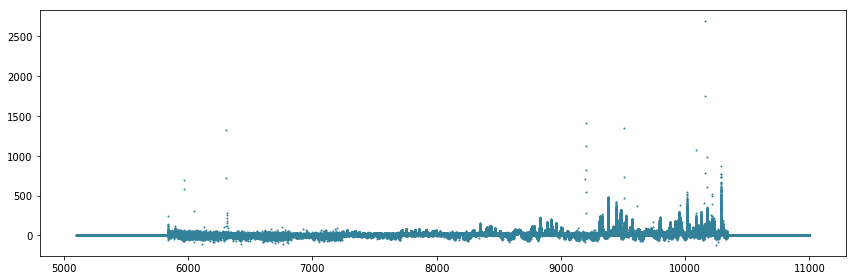

In [1494]:
x = wavelength_spec1.data
y = pca_residual_sample.data

plt.figure(figsize = (12,4))

plt.scatter(x,y,s=1,c =[0.2,0.5,0.6])
plt.tight_layout()
plt.show()

In [1495]:
pca_residual_sample_ratio = pca_residual_sample / total_flux_spec1

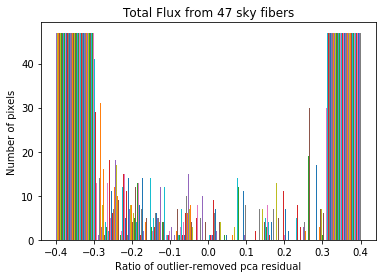

In [1499]:
plt.hist(pca_residual_sample_ratio, bins='auto')
plt.title("Total Flux from 47 sky fibers")
plt.xlabel('Ratio of outlier-removed pca residual')
plt.ylabel('Number of pixels')
plt.show()

Residual of total flux between first sky fiber and pca estimated first sky fiber. 

In [ ]:
principalComponents = pca.fit_transform()

In [247]:
print(pca.explained_variance_ratio_)

[0.21920758 0.15434775 0.10396738 0.08496815 0.05808056 0.04930152
 0.04043168 0.02886439]


In [248]:
print(pca.singular_values_)

[180.32054 151.30997 124.18409 112.26529  92.81812  85.51604  77.44231
  65.43327]


In [250]:
pca.explained_variance_ratio_.sum()

0.739169

In [252]:
# Explained variance of first 5 principal components
0.21920775 + 0.15434761 + 0.10396753 + 0.08496818 + 0.05808052

0.6205715900000001

In [185]:
pca = PCA(n_components=100)

In [186]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [187]:
print(pca.explained_variance_ratio_)

[2.19207615e-01 1.54347777e-01 1.03967294e-01 8.49681720e-02
 5.80805168e-02 4.93013896e-02 4.04317826e-02 2.88645010e-02
 2.25780495e-02 2.06022933e-02 1.73020922e-02 1.25277927e-02
 1.21007571e-02 1.01174349e-02 9.54402238e-03 8.36154260e-03
 7.95927271e-03 7.16058677e-03 6.85354834e-03 6.38544559e-03
 6.17121253e-03 6.04692847e-03 5.92701044e-03 5.73489023e-03
 5.62608009e-03 5.33246063e-03 5.28543722e-03 5.20142401e-03
 5.07623283e-03 4.85795783e-03 4.68601240e-03 4.57566511e-03
 4.55568405e-03 4.44721850e-03 4.33822395e-03 4.28939378e-03
 4.13350295e-03 4.01872490e-03 3.88514181e-03 3.86803737e-03
 3.79185262e-03 3.67065938e-03 3.55064869e-03 3.50640365e-03
 3.42048495e-03 3.34088760e-03 3.87032859e-15]


### PCA on residuals from average subtracted total flux on sky fibers

In [ ]:
pca = PCA(n_components=8)

In [214]:
Y = StandardScaler().fit_transform(total_flux_residuals_sky_fiber.data)

In [218]:
pca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [219]:
print(pca.explained_variance_ratio_)

[0.21920756 0.15434754 0.10396729 0.08496828 0.05808059 0.04930148
 0.04043162 0.02886435]


In [233]:
pca = PCA(n_components=4)

In [214]:
Y = StandardScaler().fit_transform(total_flux_residuals_sky_fiber.data)

In [234]:
pca.fit(Y)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [235]:
print(pca.explained_variance_ratio_)

[0.21920756 0.15434764 0.1039673  0.08496817]


### Testing of weighted average

In [180]:
total_flux_spec1.shape

(47, 4128)

In [181]:
average_sky_flux1.shape

(4128,)

In [352]:
type(weighted_average_spec1)

numpy.ma.core.MaskedArray

In [355]:
weighted_average_spec1.shape

(4128,)

In [353]:
weighted_average_spec1.count()

3110

In [347]:
type(average_sky_flux1)

numpy.ndarray

In [348]:
len(average_sky_flux1)

4128

#### Total Flux of SKY Fibers subtracted by the average sky signal
Subtract Average Total Flux of Sky Fibers from Total Flux of each SKY Fibers

Replicate average_sky_flux1 to dimension of (47, 4128).

In [211]:
repeated47_average_sky_flux1 = np.tile(average_sky_flux1, (47,1))

In [212]:
repeated47_average_sky_flux1.shape

(47, 4128)

In [458]:
np.max(repeated47_average_sky_flux1)

104.62009

In [459]:
np.median(repeated47_average_sky_flux1)

5.293231

In [460]:
np.min(repeated47_average_sky_flux1)

0.0

Inspection of total_flux_spec1

In [453]:
np.min(total_flux_spec1.data)

-51.820637

In [444]:
np.median(total_flux_spec1.data)

5.7267346

In [427]:
np.max(total_flux_spec1.data)

2692.287

A plot of wavelength vs. median residuals across fibers from total flux of 47 sky fibers.

In [484]:
residual_median_across_fibers = np.median(total_flux_residuals_sky_fiber.data, axis=0)

In [485]:
residual_median_across_fibers.shape

(4128,)

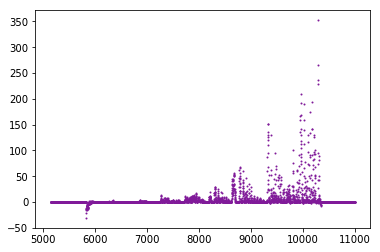

In [486]:
x = wavelength_spec1.data[0]
y = residual_median_across_fibers

plt.scatter(x,y,s=1, c=[0.5,0.1,0.6])
plt.show()

Median Absolute Deviation

In [494]:
residuals_mad = stats.median_absolute_deviation(total_flux_residuals_sky_fiber.data)

In [501]:
total_flux_residuals_sky_fiber.data.shape

(47, 4128)

In [505]:
residuals_mad

0.91774154

In [502]:
flattened_residuals = np.ndarray.flatten(total_flux_residuals_sky_fiber.data)

In [508]:
statistics = abs(total_flux_residuals_sky_fiber-residuals_mad)/residuals_mad

In [511]:
statistics.shape

(47, 4128)

In [ ]:
for i in statistics

In [512]:
np.mean(statistics.data)

9.828066

In [513]:
np.min(statistics.data)

0.0

In [515]:
np.median(statistics.data)

1.386084

In [514]:
np.max(statistics.data)

2655.9468

In [ ]:
total_flux

In [503]:
flattened_residuals.shape

(194016,)

In [1288]:
for i in flattened_residuals:
    lower_mad = []
    higher_mad = []
    if i < residuals_mad:
        lower_mad.append([i])
        higher_mad.append([i])

NameError: name 'flattened_residuals' is not defined

In [ ]:
def doubleMAD

In [496]:
residuals_mad_across_fibers = stats.median_absolute_deviation(total_flux_residuals_sky_fiber.data, axis=0)

(4128,)

Comparison between estimated average sky signal and total flux from 47 Sky fibers.

0.6744907594765952

#### Sky Flux of SKY Fibers subtracted by the average sky signal
Subtract Average Total Flux of Sky Fibers from Sky Flux of each SKY Fibers

In [195]:
sky_residuals_sky_fiber = np.ma.array(sky_spec1.data - repeated47_average_sky_flux1, mask = sky_spec1.mask)

NameError: name 'repeated47_average_sky_flux1' is not defined

In [408]:
sky_residuals_sky_fiber.shape

(47, 4128)

In [445]:
sky_residual_median_along_fiber = np.median(sky_residuals_sky_fiber.data)

In [446]:
np.min(sky_residual_median_along_fiber)

0.0

In [447]:
np.max(sky_residual_median_along_fiber)

0.0

In [438]:
stats.median_absolute_deviation(sky_residuals_sky_fiber.data, axis =1)

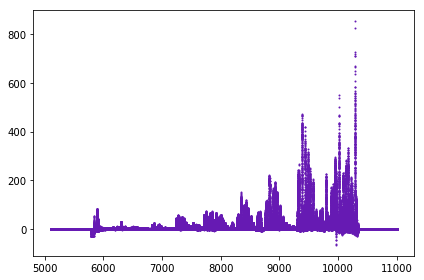

In [439]:
x = wavelength_spec1.data
y = sky_residuals_sky_fiber.data

plt.scatter(x,y,s=1,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()

### Non-SKY Fibers

The weighted average of total_flux from sky fibers are subtracted from the total_flux from non-sky fibers. The difference is compared to the flux values from non-sky fibers to check the weighted average's accuracy.

#### Get valid data for the 453 non-sky fibers in Spectrograph 1.

In [194]:
spec1_non_sky = expo0_spec1_frame.get_valid_data(fibers = non_sky_fibers1, pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [249]:
spec1_non_sky.shape

(453, 4128)

In [250]:
type(spec1_non_sky)

numpy.ma.core.MaskedArray

#### Non-SKY Flux

In [251]:
flux_non_sky_spec1 = spec1_non_sky['flux']

In [252]:
flux_non_sky_spec1.shape

(453, 4128)

In [254]:
#flux_non_sky_spec1.count(axis=1)

In [255]:
flux_non_sky_spec1.count(axis=1).sum()

1000417

In [256]:
453 * 4128

1869984

#### Non-SKY Sky

In [257]:
sky_non_sky_spec1 = spec1_non_sky['sky']

In [258]:
sky_non_sky_spec1.shape

(453, 4128)

In [368]:
len(sky_non_sky_spec1.count(axis=1))

453

#### Non-SKY Sky + Flux

In [260]:
total_flux_non_sky_spec1 = np.ma.array(flux_non_sky_spec1.data + sky_non_sky_spec1.data, mask = list(map(and_, flux_non_sky_spec1.mask, sky_non_sky_spec1.mask)))

In [261]:
total_flux_non_sky_spec1.shape

(453, 4128)

In [263]:
total_flux_non_sky_spec1.count(axis=1).sum()

1000417

#### Weighted average sky subtracted from Non-SKY Total Flux

In [387]:
weighted_average_spec1

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=1e+20,
            dtype=float32)

In [276]:
weighted_average_spec1.shape

(4128,)

In [277]:
type(weighted_average_spec1.data)

numpy.ndarray

In [278]:
weighted_average_spec1.shape

(4128,)

In [292]:
type(average_sky_flux1)

numpy.ndarray

In [289]:
average_sky_flux1.shape

(4128,)

In [357]:
repeated453_average_sky_flux1 = np.tile(average_sky_flux1, (453,1))

In [386]:
repeated453_average_sky_flux1.shape

(453, 4128)

#### Object Flux by subtraction for all non-SKY Fibers
Subtract Average Total Flux of Sky Fibers from Total Flux of non-SKY Fibers

In [314]:
calculated_flux_spec1 =np.ma.array(total_flux_non_sky_spec1.data - repeated_average_sky_flux1, mask = total_flux_non_sky_spec1.mask)

In [315]:
type(calculated_flux_spec1)

numpy.ma.core.MaskedArray

In [316]:
calculated_flux_spec1.shape

(453, 4128)

Comparison between calculated flux and original flux from Non-SKY Fiber data

In [317]:
difference_flux_spec1 = calculated_flux_spec1.data - flux_non_sky_spec1.data

In [388]:
#abs(difference_flux_spec1)/ flux_non_sky_spec1.data

In [319]:
type(difference_flux_spec1)

numpy.ndarray

In [328]:
difference_flux_spec1.mean(axis=0).mean()

3.9319134

In [329]:
flux_non_sky_spec1.data.max()

5059.031

In [330]:
flux_non_sky_spec1.data.min()

-132.85898

### Exposure[0], Spectrograph 2, Fiber 501-1000

Locate and download the file of a single science exposure for spectrogtaph 2. The exposure file to return is set to 'spCFrame'.

In [118]:
exp0_spec2_path = combined_plan.get_exposure_name(sequence_number=0,band='red',fiber = 501,ftype='spCFrame')

In [119]:
exp0_spec2_path

'/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r2-00127588.fits'

In [120]:
exp0_spec2_file = mirror.get(exp0_spec2_path)

In [121]:
exp0_spec2_file

'/scratch/kunjias/sdss/sas/dr12/boss/spectro/redux/v5_7_0/4042/spCFrame-r2-00127588.fits'

#### Frame file of exposure[0] of spectrograph 2

Frame file containing single exposure 0 of spectrograph 2 (half plate).

In [122]:
expo0_spec2_frame = plate.FrameFile(exp0_spec2_file, index=2, calibrated = True)

In [123]:
# expo0_spec2_frame
print("plate_number:",expo0_spec2_frame.plate,
'camera:',expo0_spec2_frame.camera,
'exposure_id:',expo0_spec2_frame.exposure_id)
# expo0_spec2_frame.header

plate_number: 4042 camera: r2 exposure_id: 127588


#### Get valid data for the 50 sky fibers in Spectrograph 2.

In [126]:
spec2_sky = expo0_spec2_frame.get_valid_data(fibers = sky_fibers2, pixel_quality_mask=None, include_wdisp=False, include_sky=True, use_ivar=True, use_loglam=False)

In [127]:
# spec2_sky

In [128]:
spec2_sky.shape

(50, 4128)

In [129]:
type(spec2_sky)

numpy.ma.core.MaskedArray

Access the wavelength, flux, sky, and ivar fields by creating new masked arrays.

#### Wavelength

In [135]:
wavelength_spec2 = spec2_sky['wavelength']

In [136]:
wavelength_spec2.shape

(50, 4128)

Total number of data points if all are valid.

In [138]:
50 * 4128

206400

Count the number of non-masked elements along rows (fibers).

In [139]:
wavelength_spec2.count(axis=1)

array([4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128, 4128,
       4128, 4128, 4128, 4128, 4128, 4128])

Total number of valid elements in the flux  masked array.

In [140]:
wavelength_spec2.count(axis=1).sum()

206400

#### FLux

In [141]:
flux_spec2 = spec2_sky['flux']

In [142]:
flux_spec2.shape

(50, 4128)

In [143]:
flux_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

In [144]:
flux_spec2.count(axis=1).sum()

113201

#### Sky

In [145]:
sky_spec2 = spec2_sky['sky']

In [146]:
sky_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

In [147]:
sky_spec2.count(axis=1).sum()

113201

#### Sky + Flux

In [172]:
total_flux_spec2 = np.ma.array(flux_spec2.data + sky_spec2.data, mask=list(map(and_,flux_spec2.mask, sky_spec2.mask)))

In [149]:
total_flux_spec2.shape

(50, 4128)

In [150]:
total_flux_spec2.count(axis=1)

array([2300, 2254, 2296, 2288, 2314, 2294, 2279, 2268, 2291, 2311, 2269,
       2276, 2302, 2232, 2306, 2278, 2242, 2241, 2233, 2268, 2261, 2237,
       2245, 2250, 2240, 2219, 2244, 2278, 2268, 2261, 2272, 2278, 2223,
       2221, 2278, 2271, 2274, 2261, 2230, 2247, 2280, 2296, 2267, 2265,
       2254, 2244, 2221, 2297, 2229, 2248])

Check the total number of valid data in total_flux.

In [151]:
len(total_flux_spec2.compressed())

113201

#### Inverse Variance

Inverse Variance is used as weights to computed the weighted average of total flux for sky fibers.

In [152]:
ivar_spec2 = spec2_sky['ivar']

In [153]:
type(ivar_spec2)

numpy.ma.core.MaskedArray

In [154]:
ivar_spec2.shape

(50, 4128)

Check number of valid data in the inverse variance masked array.

In [155]:
ivar_spec2.count(axis=1).sum()

113201

Fill in the invalid inverse variance data with value 0.

In [156]:
weights_by_ivar2 = ma.filled(ivar_spec2, fill_value=0)

In [157]:
type(weights_by_ivar2)

numpy.ndarray

In [158]:
weights_by_ivar2.shape

(50, 4128)

A plot for the total flux among the 50 sky fibers in spectrograph 2.

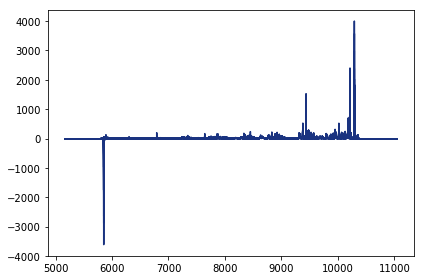

In [171]:
x = wavelength_spec2.data
y = total_flux_spec2.data
plt.plot(x,y,c=[0.1,0.2,0.5])
plt.tight_layout()
plt.show()

#### Simple Average
Average of total_flux among 50 sky fibers without no weights.

In [159]:
simple_average2 = ma.average(total_flux_spec2, axis=0, returned=False)

In [160]:
type(simple_average2)

numpy.ma.core.MaskedArray

In [161]:
simple_average_flux2 = simple_average2.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

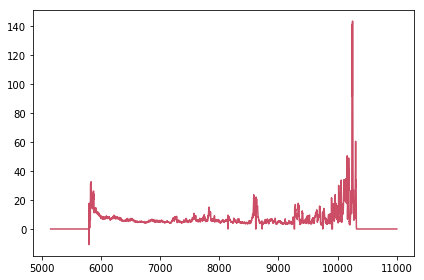

In [162]:
x = wavelength_fiber14
y = simple_average_flux2
plt.plot(x,y,c =[0.8,0.3,0.4])
plt.tight_layout()
plt.show()

#### Weighted Average
Average of total_flux of 50 sky fibers in spectrograph 2 weighted by inverse variance.

In [271]:
weighted_average_spec2 = ma.average(total_flux_spec2,axis=0, weights = weights_by_ivar2, returned= False)

In [272]:
type(weighted_average_spec2)

numpy.ma.core.MaskedArray

In [273]:
average_sky_flux2 = weighted_average_spec2.data

Wavelegnth from the first sky fiber (fiber no.14) is taken as the standard wavelength scale to plot the total_flux here.

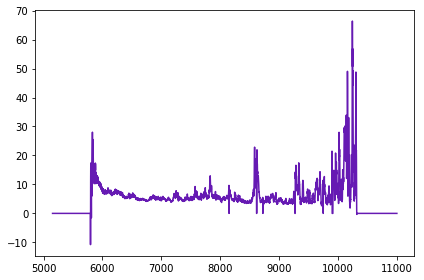

In [274]:
x = wavelength_fiber14
y = average_sky_flux2
plt.plot(x,y,c =[0.4,0.1,0.7])
plt.tight_layout()
plt.show()